# Preview data

In [4]:
# import library
import numpy as np
import pandas as pd

In [5]:
# read data
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Check the columns of train and test whether having differences

In [6]:
# train_df
train_df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [7]:
test_df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [54]:
sample_df = pd.read_csv("/content/sample_submission.csv")
sample_df.head(5)

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


# Note
Dữ liệu đã được tải lên và có cấu trúc gồm 38 cột với các thông tin liên quan đến sinh viên, bao gồm:
- Thông tin cá nhân và học vấn (Marital status, Application mode, Course, Previous qualification, etc.)
- Thông tin về các đơn vị học phần (Curricular units, grades, evaluations, etc.)
- Thông tin kinh tế (Unemployment rate, Inflation rate, GDP)
Kết quả cuối cùng của sinh viên (Target)

# Tiền xử lý dữ liệu

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

missing value

In [10]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [11]:
# compute missing_value
features = list(train_df.columns)
features.remove("Target") # Remove "Target" after converting to list
target = ["Target"]

# Compute missing value of each feature
def display_missing(df,feature):
    n_rows = df.shape[0]
    missing_count = df[feature].isnull().sum()
    missing_rate = round(100 * missing_count/n_rows,2)
    return missing_rate

missing_table_train = dict()
missing_table_train["feature"] = features
missing_table_train["Missing_Rate"] = [display_missing(train_df,feature) for feature in features]

missing_table_train_df = pd.DataFrame(missing_table_train)
missing_table_train_df

,feature,Missing_Rate
0,id,0.0
1,Marital status,0.0
2,Application mode,0.0
3,Application order,0.0
4,Course,0.0
5,Daytime/evening attendance,0.0
6,Previous qualification,0.0
7,Previous qualification (grade),0.0
8,Nacionality,0.0
9,Mother's qualification,0.0


Note: dữ liệu không có missing value

Outliers

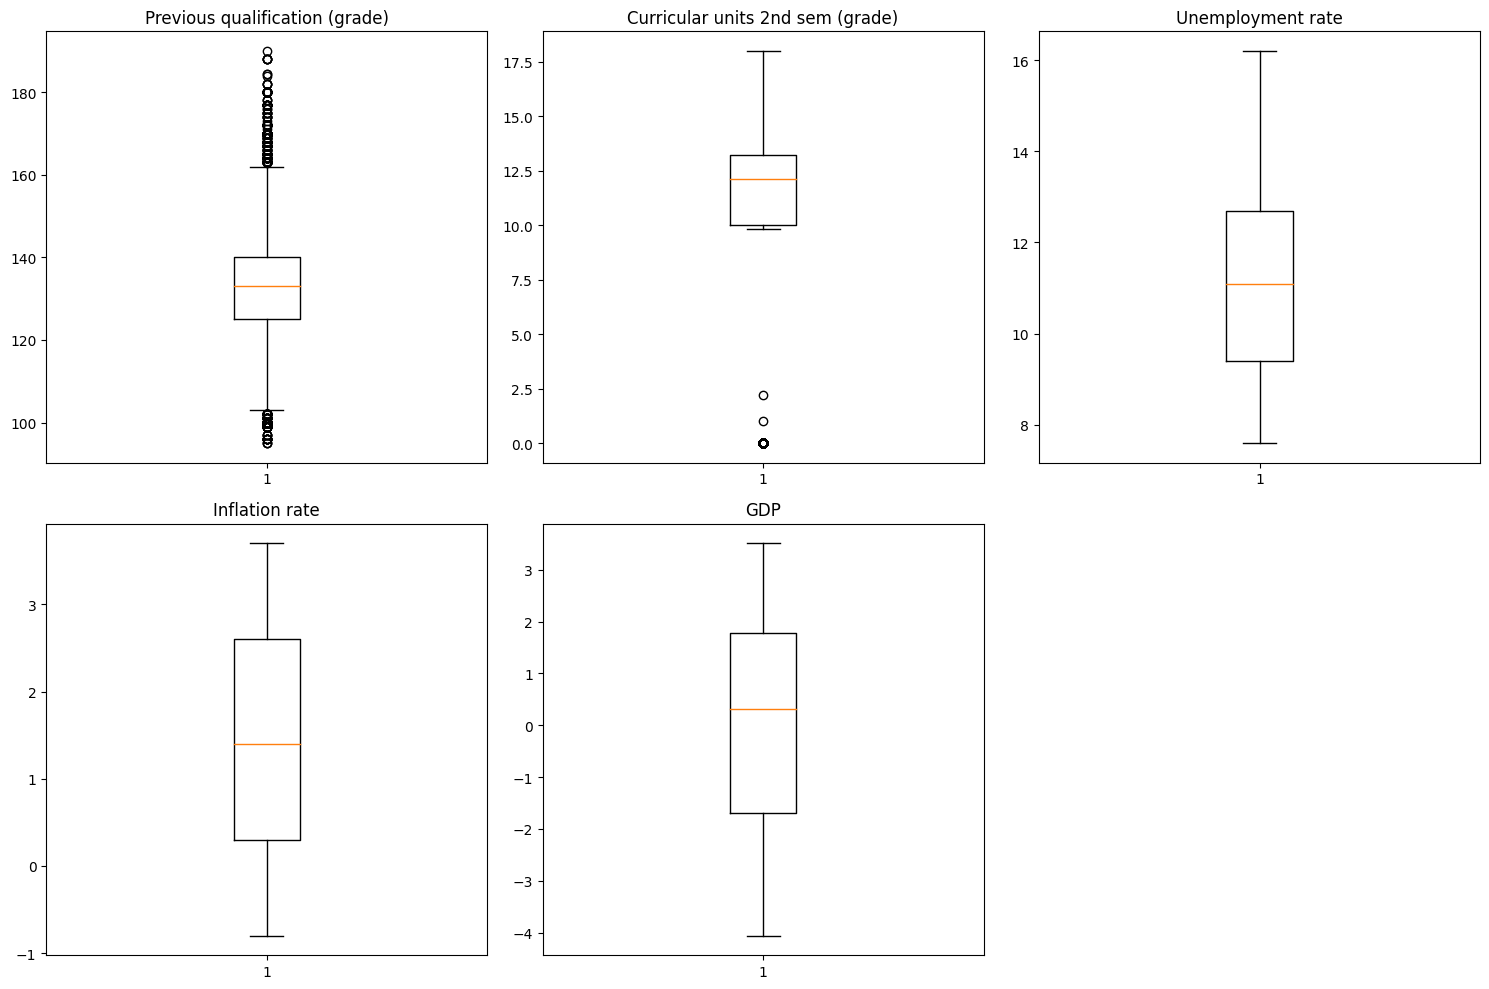

In [12]:
import matplotlib.pyplot as plt

# List of columns to check for outliers
columns_to_check = [
    'Previous qualification (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Plotting box plots for each of the selected columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(train_df[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()


In [13]:
# Checking the minimum and maximum values of the columns to identify outliers
outliers_summary = train_df[columns_to_check].describe().loc[['min', 'max']]
outliers_summary

,Previous qualification (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
min,95.0,0.0,7.6,-0.8,-4.06
max,190.0,18.0,16.2,3.7,3.51


Kiểm tra giá trị tối thiểu và tối đa
Previous qualification (grade):

Giá trị thấp nhất: 95.0
Giá trị cao nhất: 190.0
Curricular units 2nd sem (grade):

Giá trị thấp nhất: 0.0
Giá trị cao nhất: 18.0
Unemployment rate:

Giá trị thấp nhất: 7.6
Giá trị cao nhất: 16.2
Inflation rate:

Giá trị thấp nhất: -0.8
Giá trị cao nhất: 3.7
GDP:

Giá trị thấp nhất: -4.06
Giá trị cao nhất: 3.51

Các giá trị này có thể chấp nhận được tùy thuộc vào ngữ cảnh của dữ liệu. Tuy nhiên, để chắc chắn hơn, chúng ta sẽ xem xét phân phối cụ thể của từng biến số.

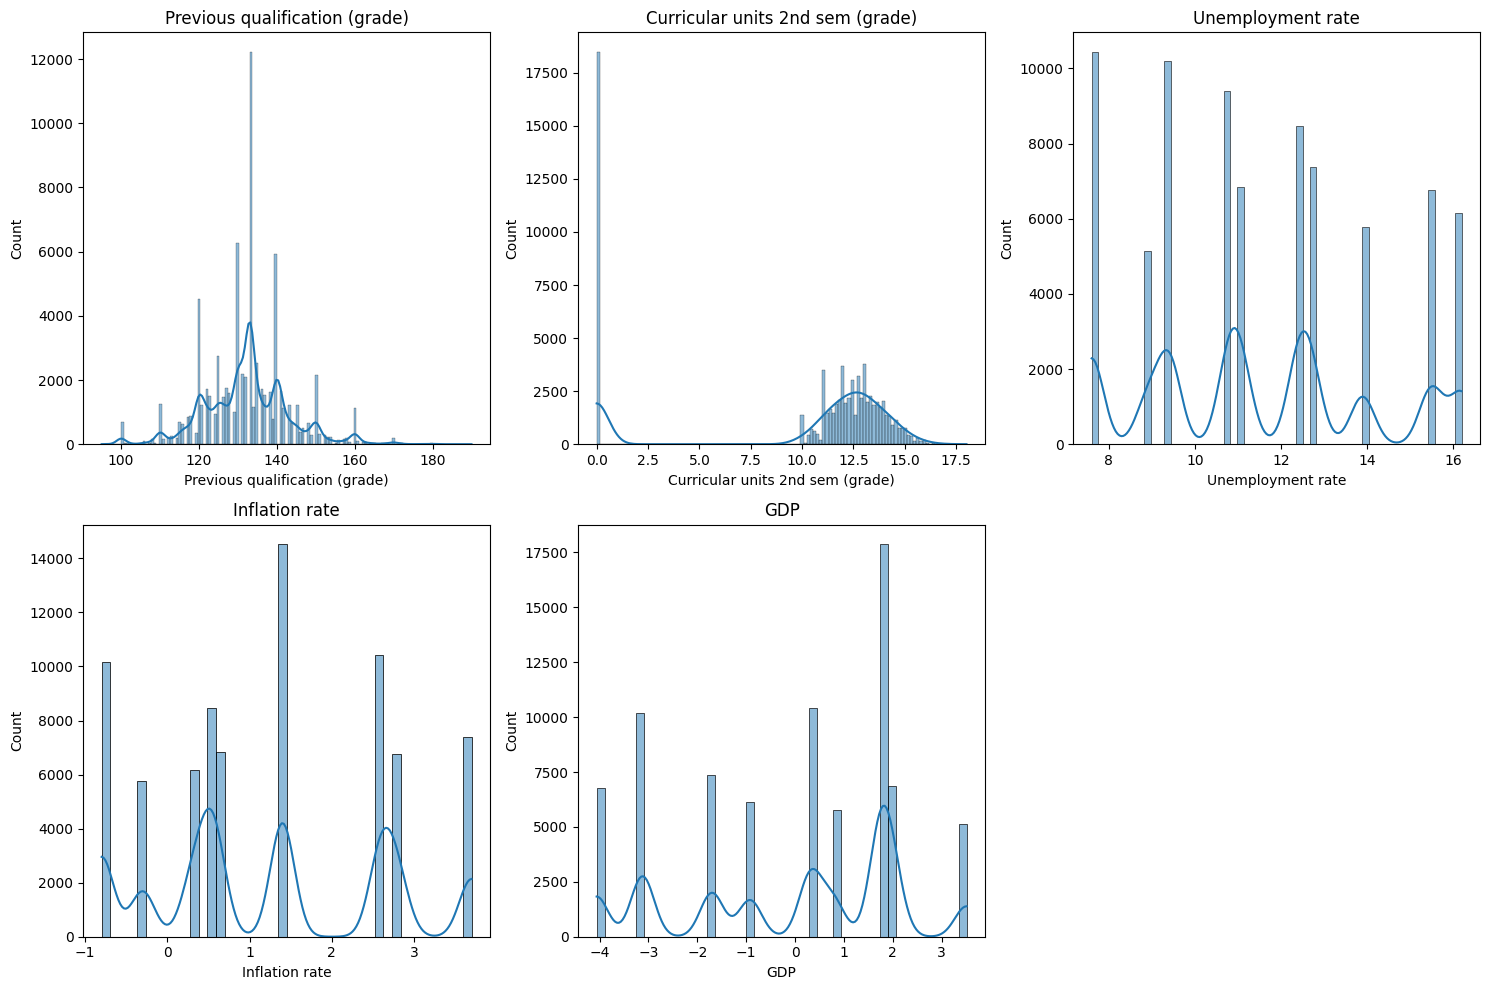

In [14]:
import seaborn as sns

# Plotting histograms for each of the selected columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column].dropna(), kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


Các biểu đồ phân phối cho thấy:

- Previous qualification (grade) và Curricular units 2nd sem (grade):

- Phân phối có vẻ hợp lý với một số giá trị cao hơn, có thể là do các sinh viên xuất sắc hoặc có điểm số tốt hơn.

Unemployment rate, Inflation rate, và GDP:

- Phân phối của các biến số này cũng khá hợp lý, với một số giá trị cực đoan nhưng không quá bất thường.

Kết luận về tiền xử lý dữ liệu:
- Không có giá trị thiếu.
- Các ngoại lệ không quá bất thường và có thể chấp nhận được trong ngữ cảnh của dữ liệu.

# Tiếp theo: Phân tích thăm dò dữ liệu (EDA)
Chúng ta sẽ thực hiện phân tích thăm dò dữ liệu để hiểu rõ hơn về cấu trúc, phân bố và các đặc tính của dữ liệu.

Phân tích mối tương quan giữa các biến số
Chúng ta sẽ tính toán và trực quan hóa ma trận tương quan giữa các biến số.

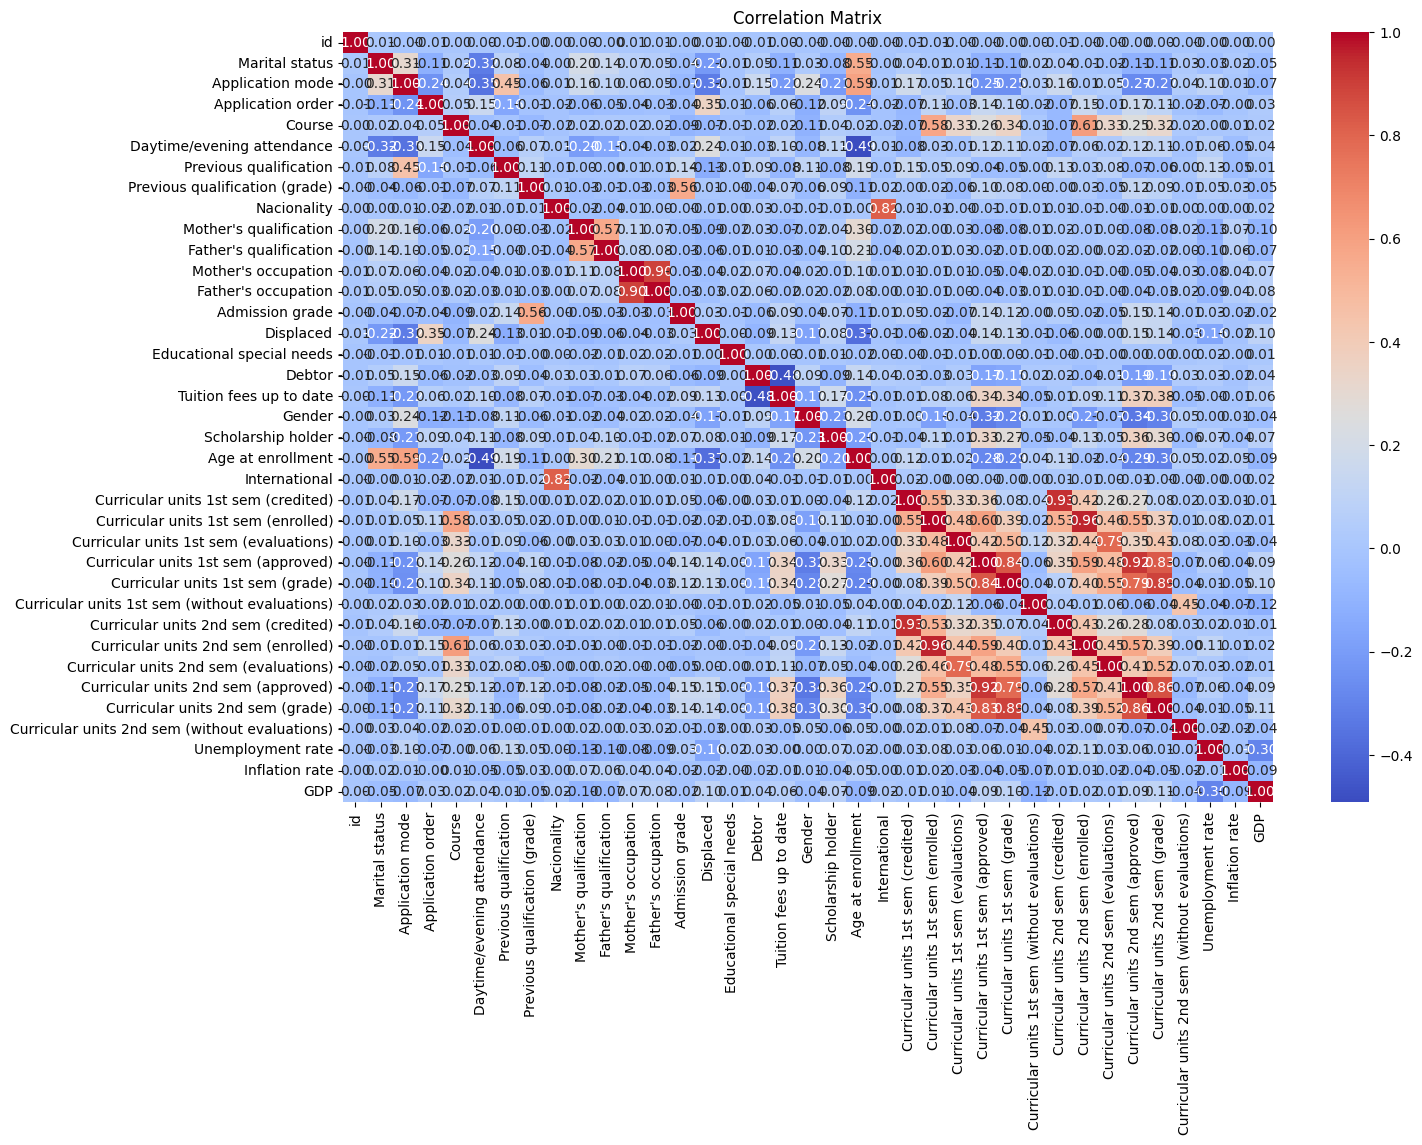

In [15]:
# Calculate the correlation matrix, considering only numeric columns
correlation_matrix = train_df.corr(numeric_only=True)

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Ma trận tương quan cho thấy mối quan hệ giữa các biến số trong dữ liệu. Một số điểm nổi bật:
- Curricular units 2nd sem (grade) có mối tương quan dương mạnh với Curricular units 2nd sem (approved).
- GDP có mối tương quan dương với Unemployment rate.
- Previous qualification (grade) có một số mối tương quan yếu với các biến khác.

Tiếp theo: Phân tích chuyên sâu
Kiểm định giả thuyết
- Chúng ta sẽ kiểm định một số giả thuyết để khám phá các mẫu và xu hướng trong dữ liệu. Để bắt đầu, chúng ta sẽ kiểm định giả thuyết về sự khác biệt giữa điểm trung bình của các sinh viên trong các nhóm khác nhau của biến Target (Graduate, Dropout, Enrolled).
- Chúng ta sẽ sử dụng phân tích ANOVA để kiểm tra sự khác biệt giữa các nhóm

In [16]:
from scipy.stats import f_oneway

# Extracting the groups
graduate_group = train_df[train_df['Target'] == 'Graduate']['Curricular units 2nd sem (grade)']
dropout_group = train_df[train_df['Target'] == 'Dropout']['Curricular units 2nd sem (grade)']
enrolled_group = train_df[train_df['Target'] == 'Enrolled']['Curricular units 2nd sem (grade)']

# Performing ANOVA
anova_result = f_oneway(graduate_group.dropna(), dropout_group.dropna(), enrolled_group.dropna())
anova_result


F_onewayResult(statistic=49461.25651416838, pvalue=0.0)

Kết quả này cho thấy rằng có sự khác biệt có ý nghĩa thống kê giữa điểm trung bình của các sinh viên trong các nhóm Target khác nhau (Graduate, Dropout, Enrolled).

# Tiếp theo: Trực quan hóa kết quả
Chúng ta sẽ tạo các biểu đồ để trực quan hóa sự khác biệt giữa các nhóm Target về điểm số của các đơn vị học phần kỳ 2

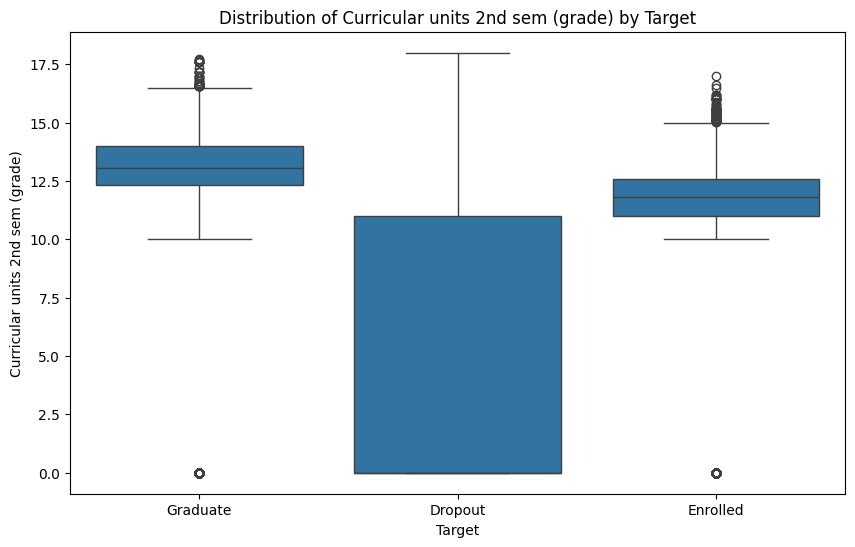

In [17]:
# Plotting box plots for the Curricular units 2nd sem (grade) across different Target groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Target', y='Curricular units 2nd sem (grade)')
plt.title('Distribution of Curricular units 2nd sem (grade) by Target')
plt.show()


Biểu đồ hộp cho thấy sự khác biệt rõ rệt về điểm số của các đơn vị học phần kỳ 2 giữa các nhóm Target (Graduate, Dropout, Enrolled). Cụ thể, nhóm Graduate có điểm số trung bình cao hơn so với nhóm Dropout và Enrolled.

# Tổng kết và khuyến nghị
Tổng kết:
- Không có giá trị thiếu trong dữ liệu.
- Các ngoại lệ trong dữ liệu có thể chấp nhận được.
- Ma trận tương quan cho thấy một số mối tương quan đáng chú ý giữa các biến số.
- Kết quả phân tích ANOVA cho thấy có sự khác biệt có ý nghĩa thống kê giữa các nhóm Target về điểm số của các đơn vị học phần kỳ 2.
Khuyến nghị:
- Tiếp tục theo dõi và cải thiện điểm số của các sinh viên trong nhóm Dropout để giảm tỷ lệ bỏ học.
- Nghiên cứu thêm về các yếu tố ảnh hưởng đến điểm số và kết quả học tập của sinh viên để có biện pháp hỗ trợ phù hợp.

# Xác định Feature quan trọng
- Feature Importance từ mô hình cây quyết định: Sử dụng mô hình cây quyết định để xác định tầm quan trọng của từng feature.
- Correlation Matrix: Dựa trên ma trận tương quan để xem các feature nào có mối tương quan mạnh với biến mục tiêu.
- Chi-Square Test: Sử dụng kiểm định Chi-Square để xác định mối quan hệ giữa các biến phân loại và biến mục tiêu.
- PCA (Principal Component Analysis): Sử dụng phân tích thành phần chính để xác định các feature đóng góp nhiều nhất vào sự biến đổi của dữ liệu.
Trong phân tích, tôi sẽ dùng Mô hình RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preprocessing: Encode categorical target variable
label_encoder = LabelEncoder()
train_df['Target_encoded'] = label_encoder.fit_transform(train_df['Target'])

# Features and target variable
X = train_df.drop(columns=['id', 'Target', 'Target_encoded'])
y = train_df['Target_encoded']

# Handle missing values by filling with the mean of the column
X = X.fillna(X.mean())

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.head(10)


,Feature,Importance
30,Curricular units 2nd sem (approved),0.166956
31,Curricular units 2nd sem (grade),0.144469
24,Curricular units 1st sem (approved),0.098654
25,Curricular units 1st sem (grade),0.076657
29,Curricular units 2nd sem (evaluations),0.053297
23,Curricular units 1st sem (evaluations),0.048168
12,Admission grade,0.040679
6,Previous qualification (grade),0.033366
19,Age at enrollment,0.032229
16,Tuition fees up to date,0.029220


Top 10 Feature Quan Trọng
Dưới đây là 10 feature quan trọng nhất dựa trên mô hình cây quyết định:
- Curricular units 2nd sem (approved): Đơn vị học phần kỳ 2 được thông qua.
- Curricular units 2nd sem (grade): Điểm số đơn vị học phần kỳ 2.
- Curricular units 1st sem (approved): Đơn vị học phần kỳ 1 được thông qua.
- Curricular units 1st sem (grade): Điểm số đơn vị học phần kỳ 1.
- Curricular units 2nd sem (evaluations): Số lần đánh giá đơn vị học phần kỳ 2.
- Curricular units 1st sem (evaluations): Số lần đánh giá đơn vị học phần kỳ 1.
- Admission grade: Điểm số nhập học.
- Previous qualification (grade): Điểm số của bằng cấp trước đó.
- Age at enrollment: Tuổi khi nhập học.
- Tuition fees up to date: Học phí đã được thanh toán đến ngày hiện tại.

# Visualize 1 feature quan trọng trong 10 feature trên

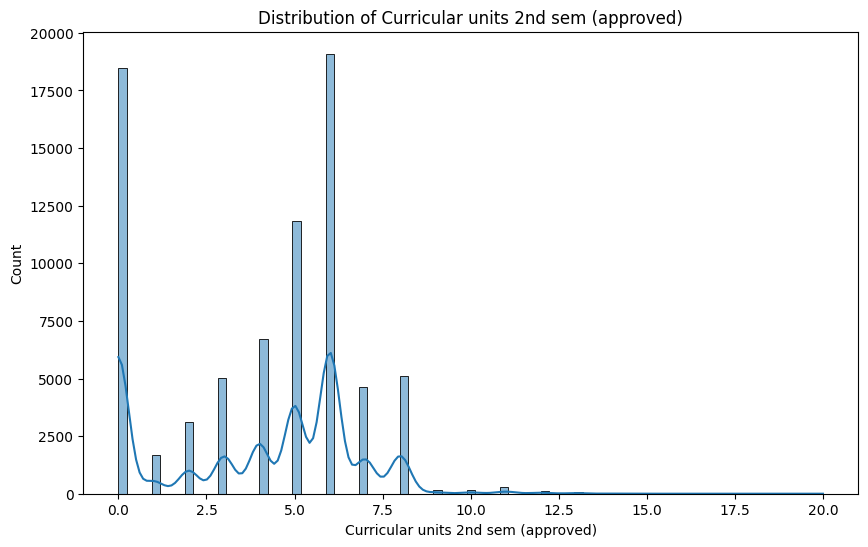

In [19]:
# Plotting the distribution of the 'Curricular units 2nd sem (approved)' column
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Curricular units 2nd sem (approved)'], kde=True)
plt.title('Distribution of Curricular units 2nd sem (approved)')
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Count')
plt.show()

- Biểu đồ trên cho thấy phân phối của số lượng đơn vị học phần kỳ 2 được thông qua (Curricular units 2nd sem (approved)).

- Phần lớn các sinh viên có số lượng đơn vị học phần kỳ 2 được thông qua từ 0 đến 8, với một số sinh viên đạt số lượng lớn hơn.

Biểu đồ biểu diễn mối quan hệ cột Curricular units 2nd sem (approved) và target

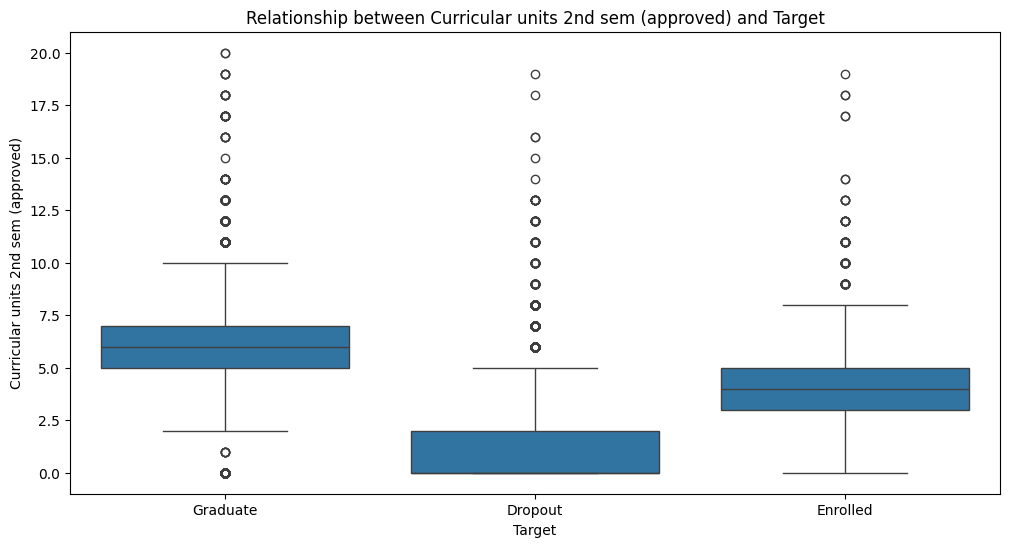

In [20]:
# Plotting the relationship between 'Curricular units 2nd sem (approved)' and 'Target'
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Target', y='Curricular units 2nd sem (approved)')
plt.title('Relationship between Curricular units 2nd sem (approved) and Target')
plt.xlabel('Target')
plt.ylabel('Curricular units 2nd sem (approved)')
plt.show()


Biểu đồ hộp cho thấy mối quan hệ giữa số lượng đơn vị học phần kỳ 2 được thông qua (Curricular units 2nd sem (approved)) và kết quả học tập (Target):
- Graduate: Sinh viên tốt nghiệp có số lượng đơn vị học phần được thông qua nhiều hơn so với các nhóm khác.
- Dropout: Sinh viên bỏ học có số lượng đơn vị học phần được thông qua ít nhất.
- Enrolled: Sinh viên đang theo học có số lượng đơn vị học phần được thông qua nằm giữa hai nhóm trên.
- Biểu đồ này cho thấy rằng số lượng đơn vị học phần kỳ 2 được thông qua có mối quan hệ mạnh mẽ với kết quả học tập của sinh viên.

# Train Model

Encode the target variable

In [21]:
label_encoder = LabelEncoder()
train_df['Target_encoded'] = label_encoder.fit_transform(train_df['Target'])

Feature engineering

- Tổng số đơn vị học phần được thông qua:
- Total approved units: Tổng số đơn vị học phần được thông qua trong cả hai kỳ.

In [22]:
train_df['Total approved units'] = train_df['Curricular units 1st sem (approved)'] + train_df['Curricular units 2nd sem (approved)']

- Tổng điểm trung bình của các đơn vị học phần:
- Average grade: Điểm trung bình của tất cả các đơn vị học phần.

In [23]:
train_df['Average grade'] = (train_df['Curricular units 1st sem (grade)'] + train_df['Curricular units 2nd sem (grade)']) / 2

- Tỷ lệ đơn vị học phần được thông qua:
- Approval rate: Tỷ lệ đơn vị học phần được thông qua so với tổng số đơn vị học phần đăng ký.

In [24]:
train_df['Approval rate'] = train_df['Total approved units'] / (train_df['Curricular units 1st sem (enrolled)'] + train_df['Curricular units 2nd sem (enrolled)'])

- Thời gian học:
- Study time: Tổng số giờ học của sinh viên.

In [25]:
train_df['Study time'] = train_df['Curricular units 1st sem (evaluations)'] + train_df['Curricular units 2nd sem (evaluations)']

- Điểm trung bình nhập học và các đơn vị học phần:
- Admission and units grade: Tạo một feature kết hợp điểm nhập học và điểm trung bình các đơn vị học phần.

In [26]:
train_df['Admission and units grade'] = train_df['Admission grade'] * train_df['Average grade']

- Số lần đánh giá không đạt:
- Failed evaluations: Số lần sinh viên bị đánh giá không đạt.

In [27]:
train_df['Failed evaluations'] = (train_df['Curricular units 1st sem (enrolled)'] - train_df['Curricular units 1st sem (approved)']) + (train_df['Curricular units 2nd sem (enrolled)'] - train_df['Curricular units 2nd sem (approved)'])

- Tỷ lệ giữa điểm số kỳ 1 và kỳ 2:
- Grade ratio: Tỷ lệ giữa điểm số kỳ 1 và kỳ 2 để xem xét sự tiến bộ hay thụt lùi của sinh viên.

In [28]:
train_df['Grade ratio'] = train_df['Curricular units 2nd sem (grade)'] / (train_df['Curricular units 1st sem (grade)'] + 1)  # +1 để tránh chia cho 0

Xem Train_df

In [29]:
train_df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,GDP,Target,Target_encoded,Total approved units,Average grade,Approval rate,Study time,Admission and units grade,Failed evaluations,Grade ratio
0,0,1,1,1,9238,1,1,126.0,1,1,...,2.02,Graduate,2,12,13.464286,1.000000,13,1650.721429,0,0.801843
1,1,1,17,1,9238,1,1,125.0,1,19,...,2.02,Dropout,0,4,5.800000,0.333333,17,694.840000,8,0.000000
2,2,1,17,2,9254,1,1,137.0,1,3,...,-0.92,Dropout,0,0,0.000000,0.000000,0,0.000000,12,0.000000
3,3,1,1,3,9500,1,1,131.0,1,19,...,2.02,Enrolled,1,14,12.705625,0.933333,20,1602.179313,1,0.943254
4,4,1,1,2,9500,1,1,132.0,1,19,...,0.32,Graduate,2,12,12.933333,0.857143,24,1553.293333,2,0.928230


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [31]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Approval rate    2660
dtype: int64

- Cột Approval rate có 2660 giá trị thiếu
- Xử lý giá trị thiếu là điền giá trị trung bình hoặc giá trị trung vị của cột.

In [32]:

# Fill missing values in 'Approval rate' with the median
train_df['Approval rate'].fillna(train_df['Approval rate'].median(), inplace=True)

# Verify that there are no missing values in the relevant columns
missing_values_new_features_after_imputation = train_df[['Total approved units', 'Average grade', 'Approval rate', 'Study time', 'Admission and units grade', 'Failed evaluations', 'Grade ratio']].isnull().sum()
missing_values_new_features_after_imputation


Total approved units         0
Average grade                0
Approval rate                0
Study time                   0
Admission and units grade    0
Failed evaluations           0
Grade ratio                  0
dtype: int64

Training

In [33]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [35]:
# Preprocessing
X = train_df.drop(columns=['id', 'Target', 'Target_encoded'])
y = train_df['Target_encoded']

# Check for infinite values and replace them with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a suitable strategy (e.g., median)
X.fillna(X.median(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [36]:
# Define models
seed = 42
models = {
    'SVC': SVC(random_state=seed),
    'KNeighbors': KNeighborsClassifier(metric="minkowski", p=2),
    'LogisticRegression': LogisticRegression(solver="liblinear", max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=seed, criterion="entropy", max_depth=5),
    'RandomForest': RandomForestClassifier(random_state=seed),
    'GradientBoosting': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=seed),
    'LGBMClassifier': LGBMClassifier(random_state=seed),
    'CatBoostClassifier': CatBoostClassifier(silent=True, random_state=seed)
}

In [37]:
# Select model
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Train and evaluate the models, and collect metrics
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'Confusion Matrix'])
results_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2419
[LightGBM] [Info] Number of data points in the train set: 53562, number of used features: 43
[LightGBM] [Info] Start training from score -1.106315
[LightGBM] [Info] Start training from score -1.628037
[LightGBM] [Info] Start training from score -0.748850


,Model,Accuracy,Recall,Precision,F1 Score,Confusion Matrix
0,SVC,0.822791,0.769501,0.792644,0.778396,"[[6116, 930, 533], [457, 2490, 1478], [143, 52..."
1,KNeighbors,0.792037,0.738123,0.749064,0.742722,"[[6168, 891, 520], [755, 2254, 1416], [321, 87..."
2,LogisticRegression,0.814863,0.753531,0.782541,0.763887,"[[6211, 818, 550], [540, 2229, 1656], [201, 48..."
3,DecisionTree,0.814689,0.771003,0.781311,0.774751,"[[6098, 1002, 479], [484, 2655, 1286], [131, 8..."
4,RandomForest,0.829979,0.783397,0.797724,0.789466,"[[6327, 789, 463], [560, 2624, 1241], [165, 68..."
5,GradientBoosting,0.832985,0.787853,0.802380,0.793993,"[[6322, 785, 472], [522, 2678, 1225], [165, 66..."
6,ExtraTrees,0.829369,0.782496,0.797706,0.788839,"[[6282, 819, 478], [533, 2627, 1265], [152, 67..."
7,AdaBoost,0.823706,0.779263,0.791419,0.784357,"[[6246, 862, 471], [499, 2654, 1272], [204, 73..."
8,XGBClassifier,0.836121,0.792763,0.806384,0.798612,"[[6357, 737, 485], [540, 2728, 1157], [173, 67..."
9,LGBMClassifier,0.836557,0.793156,0.807059,0.799055,"[[6337, 762, 480], [511, 2736, 1178], [150, 67..."


In [40]:
# Sort the results DataFrame by F1 Score in descending order
sorted_results_df = results_df.sort_values(by='F1 Score', ascending=False)
sorted_results_df

,Model,Accuracy,Recall,Precision,F1 Score,Confusion Matrix
10,CatBoostClassifier,0.837036,0.793291,0.807768,0.799473,"[[6362, 736, 481], [524, 2724, 1177], [171, 65..."
9,LGBMClassifier,0.836557,0.793156,0.807059,0.799055,"[[6337, 762, 480], [511, 2736, 1178], [150, 67..."
8,XGBClassifier,0.836121,0.792763,0.806384,0.798612,"[[6357, 737, 485], [540, 2728, 1157], [173, 67..."
5,GradientBoosting,0.832985,0.787853,0.802380,0.793993,"[[6322, 785, 472], [522, 2678, 1225], [165, 66..."
4,RandomForest,0.829979,0.783397,0.797724,0.789466,"[[6327, 789, 463], [560, 2624, 1241], [165, 68..."
6,ExtraTrees,0.829369,0.782496,0.797706,0.788839,"[[6282, 819, 478], [533, 2627, 1265], [152, 67..."
7,AdaBoost,0.823706,0.779263,0.791419,0.784357,"[[6246, 862, 471], [499, 2654, 1272], [204, 73..."
0,SVC,0.822791,0.769501,0.792644,0.778396,"[[6116, 930, 533], [457, 2490, 1478], [143, 52..."
3,DecisionTree,0.814689,0.771003,0.781311,0.774751,"[[6098, 1002, 479], [484, 2655, 1286], [131, 8..."
2,LogisticRegression,0.814863,0.753531,0.782541,0.763887,"[[6211, 818, 550], [540, 2229, 1656], [201, 48..."


Giải thích về việc chọn CatBoostClassifier
- CatBoostClassifier có F1 Score cao nhất (0.799473), cho thấy mô hình này cân bằng tốt giữa Precision và Recall.
- Các chỉ số khác của CatBoostClassifier cũng rất cao:
+ Accuracy: 0.837036 (cao nhất hoặc gần như cao nhất)
+ Recall: 0.793291 (cao)
+ Precision: 0.807768 (cao)
- Những chỉ số này cho thấy rằng CatBoostClassifier không chỉ chính xác trong dự đoán mà còn đáng tin cậy trong việc phát hiện các mẫu dương tính và giữ tỷ lệ dự đoán dương tính sai ở mức thấp.

# Predict

In [47]:
# Load the trained CatBoost model (giả sử model đã train có tên là catboost_model)
catboost_model = CatBoostClassifier(silent=True, random_state=42)
catboost_model.fit(X_train, y_train)

A sample

In [48]:
# Prepare a sample for prediction
sample_data = {
    'Marital status': 1,
    'Application mode': 1,
    'Application order': 1,
    'Course': 9238,
    'Daytime/evening attendance': 1,
    'Previous qualification': 1,
    'Previous qualification (grade)': 126.0,
    'Nacionality': 1,
    'Mother\'s qualification': 1,
    'Father\'s qualification': 1,
    'Mother\'s occupation': 1,
    'Father\'s occupation': 1,
    'Admission grade': 150.0,
    'Displaced': 0,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 1,
    'Gender': 1,
    'Scholarship holder': 0,
    'Age at enrollment': 18,
    'International': 0,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 5,
    'Curricular units 1st sem (evaluations)': 5,
    'Curricular units 1st sem (approved)': 4,
    'Curricular units 1st sem (grade)': 13.0,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 5,
    'Curricular units 2nd sem (evaluations)': 5,
    'Curricular units 2nd sem (approved)': 5,
    'Curricular units 2nd sem (grade)': 14.0,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 7.0,
    'Inflation rate': 0.5,
    'GDP': 2.0
}

# Create DataFrame from the sample data
sample_df = pd.DataFrame([sample_data])

# Add new features to the sample data
sample_df['Total approved units'] = sample_df['Curricular units 1st sem (approved)'] + sample_df['Curricular units 2nd sem (approved)']
sample_df['Average grade'] = (sample_df['Curricular units 1st sem (grade)'] + sample_df['Curricular units 2nd sem (grade)']) / 2
sample_df['Approval rate'] = sample_df['Total approved units'] / (sample_df['Curricular units 1st sem (enrolled)'] + sample_df['Curricular units 2nd sem (enrolled)'])
sample_df['Study time'] = sample_df['Curricular units 1st sem (evaluations)'] + sample_df['Curricular units 2nd sem (evaluations)']
sample_df['Admission and units grade'] = sample_df['Admission grade'] * sample_df['Average grade']
sample_df['Failed evaluations'] = (sample_df['Curricular units 1st sem (enrolled)'] - sample_df['Curricular units 1st sem (approved)']) + (sample_df['Curricular units 2nd sem (enrolled)'] - sample_df['Curricular units 2nd sem (approved)'])
sample_df['Grade ratio'] = sample_df['Curricular units 2nd sem (grade)'] / (sample_df['Curricular units 1st sem (grade)'] + 1)

# Ensure sample_df has the same columns as X_train
sample_df = sample_df[X.columns]

# Standardize the sample data
sample_scaled = scaler.transform(sample_df)

# Predict with the trained model
sample_prediction = catboost_model.predict(sample_scaled)

# Decode the predicted label
predicted_label = label_encoder.inverse_transform(sample_prediction)
print(f'Predicted label: {predicted_label[0]}')

Predicted label: Graduate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test_csv

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier


# Add new features to the sample data
test_df['Total approved units'] = test_df['Curricular units 1st sem (approved)'] + test_df['Curricular units 2nd sem (approved)']
test_df['Average grade'] = (test_df['Curricular units 1st sem (grade)'] + test_df['Curricular units 2nd sem (grade)']) / 2
test_df['Approval rate'] = test_df['Total approved units'] / (test_df['Curricular units 1st sem (enrolled)'] + test_df['Curricular units 2nd sem (enrolled)'])
test_df['Study time'] = test_df['Curricular units 1st sem (evaluations)'] + test_df['Curricular units 2nd sem (evaluations)']
test_df['Admission and units grade'] = test_df['Admission grade'] * test_df['Average grade']
test_df['Failed evaluations'] = (test_df['Curricular units 1st sem (enrolled)'] - test_df['Curricular units 1st sem (approved)']) + (test_df['Curricular units 2nd sem (enrolled)'] - test_df['Curricular units 2nd sem (approved)'])
test_df['Grade ratio'] = test_df['Curricular units 2nd sem (grade)'] / (test_df['Curricular units 1st sem (grade)'] + 1)

# Replace infinity values with NaN in the sample data
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each numeric column
test_numeric_cols = test_df.select_dtypes(include=[np.number]).columns
test_df[test_numeric_cols] = test_df[test_numeric_cols].fillna(test_df[test_numeric_cols].median())

# Ensure test_df has the same columns as X_train
X_train_columns = X.columns
test_df = test_df[X_train_columns]

# Standardize the sample data using the scaler fitted on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(test_df)

# Predict with the trained model
test_prediction = catboost_model.predict(test_scaled)

# Decode the predicted label
predicted_labels = label_encoder.inverse_transform(test_prediction)
print(f'Predicted labels: {predicted_labels}')

# Assuming you have true labels for the test set, calculate the metrics
# If y_test is available, else skip the metric calculations

# Placeholder for y_test, replace with actual y_test if available
y_test = label_encoder.transform(sample_df['Target'])  # replace 'Target' with the actual target column name if available
y_pred = test_prediction

# Calculate accuracy and confusion matrix on the sample
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred, average='macro')
test_precision = precision_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Recall: {test_recall}')
print(f'Test Precision: {test_precision}')
print(f'Test F1 Score: {test_f1}')
print(f'Test Confusion Matrix:\n{test_conf_matrix}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Predicted labels: ['Dropout' 'Graduate' 'Graduate' ... 'Dropout' 'Graduate' 'Dropout']
Test Accuracy: 0.7789931780757469
Test Recall: 0.2596643926919156
Test Precision: 0.3333333333333333
Test F1 Score: 0.2919228650137741
Test Confusion Matrix:
[[    0     0     0]
 [    0     0     0]
 [ 6109  5165 39738]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
